# PYFEATS

importing necessary libraries for performing pyfeats feature extractions

In [ ]:
import os
import cv2
import numpy as np
import pyfeats
from pyfeats.textural import fos, glcm_features, glds_features, ngtdm_features, sfm_features, lte_measures, fdta, glrlm_features, fps, lbp_features
from pyfeats.histogram import histogram
from pyfeats.histogram import multiregion_histogram
from pyfeats.histogram import correlogram
from pyfeats.other import zernikes_moments, hu_moments
from pyfeats.other import tas_features
from pyfeats.other import hog_features

In [ ]:
!pip install pyfeats
!pip install numpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.4 MB/s eta 0:00:00
  Created wheel for pyfeats: filename=pyfeats-1.0.1-py3-none-any.whl size=49760 sha256=a95a35273f6718b040cf811c1cf36bf302589053e683aa469a59ddc76bc4e162
  Stored in directory: /root/.cache/pip/wheels/00/c9/c5/4d3a5cf39f7bb3bae26281c49868a4bd56f9dbbde8f919dce4
Successfully built pyfeats


Creating a function that will apply pyfeats feature extractions

In [ ]:


# Function to extract statistical, frequency domain, and FAST features from an image
def extract_features_from_vehicle_image(image_path, mask=None):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    # Apply the Canny Edge Detector to the image
    edges = cv2.Canny(img, 100, 200)  # You can adjust the threshold values
#    print(edges)
    # Perform FAST feature extraction
    fast = cv2.FastFeatureDetector_create()
    keypoints = fast.detect(img, None)
    #print(keypoints)

    # Convert the keypoints to NumPy array
    keypoints_np = np.array([[kp.pt[0], kp.pt[1]] for kp in keypoints])

    # Perform FFT to transform the image to the frequency domain
    fft_image = np.fft.fft2(img)

    # Calculate the magnitude spectrum
    magnitude_spectrum = np.abs(fft_image)
    # print(magnitude_spectrum)
    # Perform feature extraction using PyFeats functions
    fos_features, _ = fos(img, mask)
    #glcm_features_mean, glcm_features_range, _, _ = glcm_features(img, ignore_zeros=True)
    glds_feature, _ = glds_features(img, mask)
    ngtdm_feature, _ = ngtdm_features(img, mask, d=1)
    #sfm_feature, _ = sfm_features(img, mask, Lr=4, Lc=4)
    lte_feature, _ = lte_measures(img, mask, l=7)
    glrlm_feature, _ = glrlm_features(img, mask, Ng=256)
    fps_feature, _ = fps(img, mask)
    lbp_feature, _ = lbp_features(img, mask, P=[8, 16, 24], R=[1, 2, 3])

    # Append the features to the list
#     features.append(list(fos_features) + list(glcm_features_mean) + list(glcm_features_range) + list(glds_features) +
#                     list(ngtdm_features) + list(sfm_features) + list(lte_features) + list(glrlm_features) +
#                     list(fps_features) + list(lbp_features) + list(magnitude_spectrum.ravel()) + list(keypoints_np.ravel()))
    x=list(fos_features) + list(glds_feature) + list(magnitude_spectrum.ravel()) + list(keypoints_np.ravel())
   # print (x)
    features.append(x)



In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from glob import glob
import re
import cv2
import tensorflow as tf


In [ ]:
base_dir = r"C:\Users\ashfa.DESKTOP-NCU3SM5\data"
label = []       #  Assign all label
images_path = [] # Get all images path
all_images = []  # Check all images name
idx = 0          # index
img_label = []   # Assign image label
features=[]


for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(base_dir,directory),img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)

FileNotFoundError: ignored

In [ ]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['non-vehicles', 'vehicles']
Total Images : 17760
 Images shape : (64, 64, 3)


In [ ]:
data=pd.DataFrame({"image":images_path,"Label":img_label})
data

,image,Label
0,C:\Users\x\data\non-vehicles\extra1.png,non-vehicles
1,C:\Users\x\data\non-vehicles\extra10.png,non-vehicles
2,C:\Users\x\data\non-vehicles\extra100.png,non-vehicles
3,C:\Users\x\data\non-vehicles\extra1000.png,non-vehicles
4,C:\Users\x\data\non-vehicles\extra1001.png,non-vehicles
...,...,...
17755,C:\Users\x\data\vehicles\right (95).png,vehicles
17756,C:\Users\x\data\vehicles\right (96).png,vehicles
17757,C:\Users\x\data\vehicles\right (97).png,vehicles
17758,C:\Users\x\data\vehicles\right (98).png,vehicles


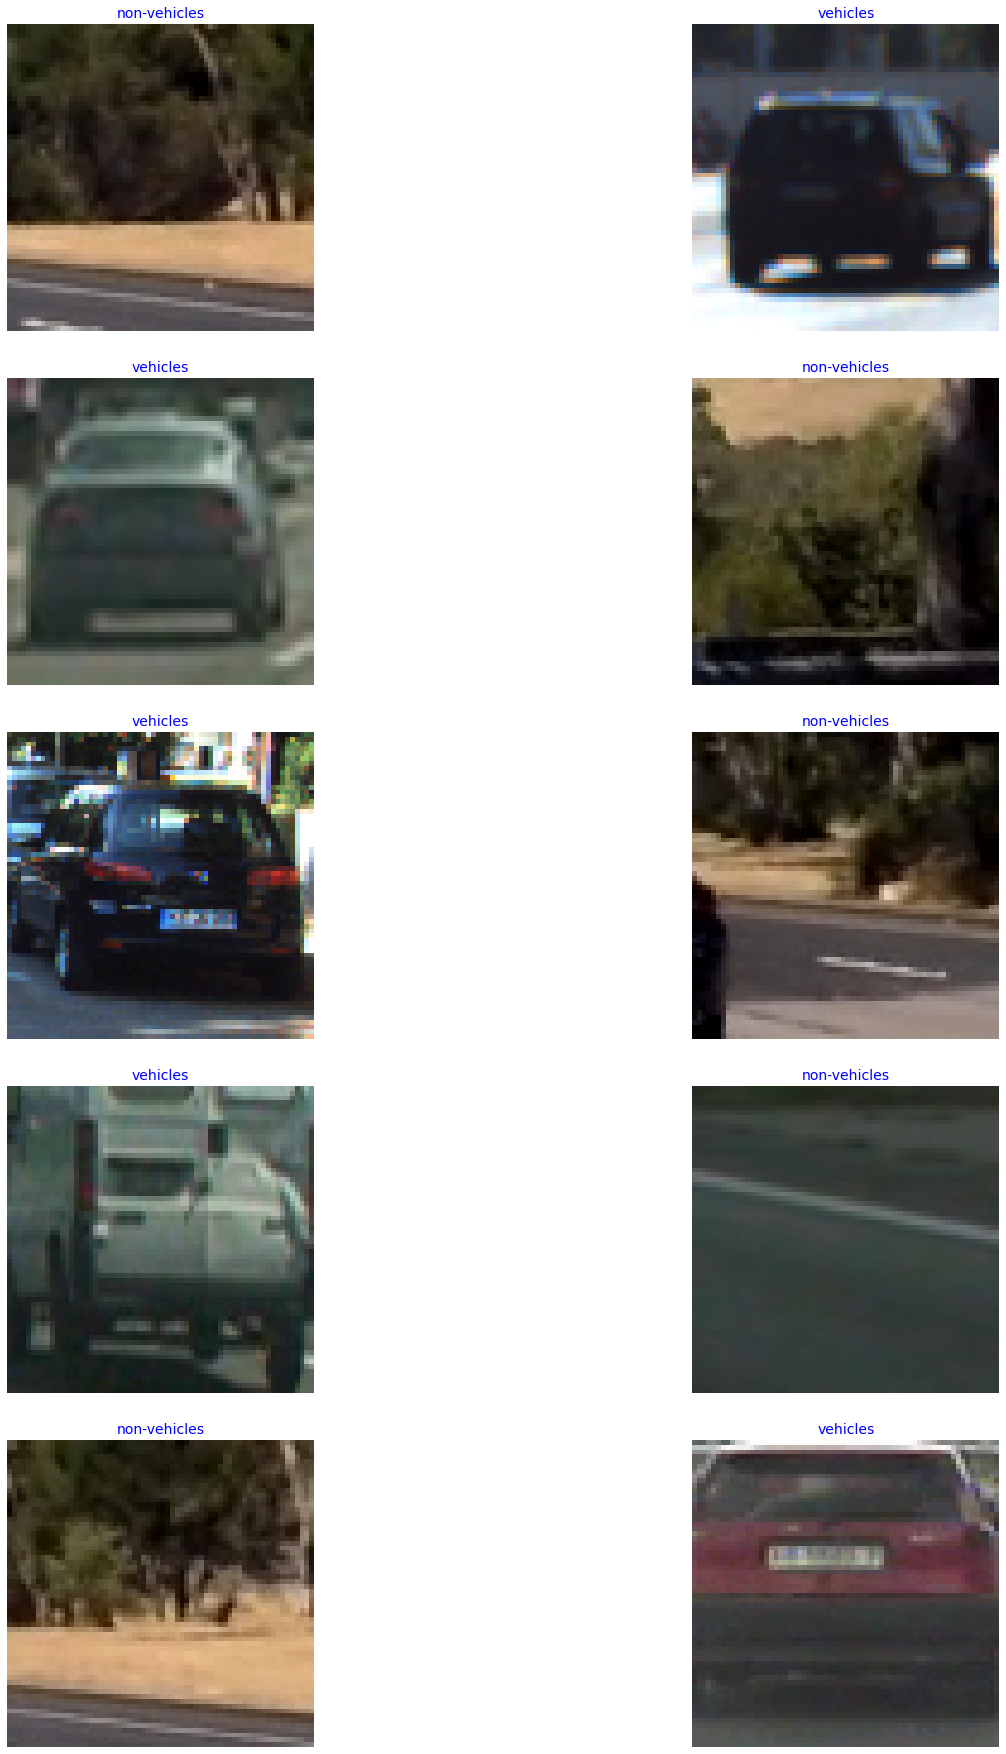

In [ ]:
random_img = data.sample(10).reset_index()
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(random_img.image[i]))
    ax.set_title(random_img.Label[i], color='blue', fontsize=14)
    ax.axis('off')
plt.tight_layout(pad=3.0)
plt.show()

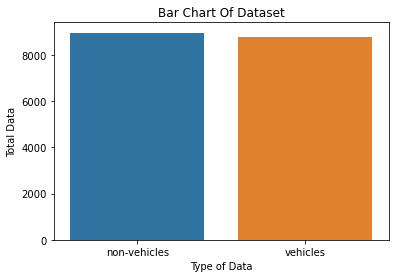

Total Images class [0]:8968
Total Images class [1]:8792


In [ ]:
data_label = data['Label'].value_counts()
#print(data_label.index)
plt.figure()
sns.barplot(x = data_label.index, y = data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]:{data_label[0]}")
print(f"Total Images class [1]:{data_label[1]}")

In [ ]:
for index, row in data.iterrows():
    image_path = row["image"]
    label = row["Label"]
    extract_features_from_vehicle_image(image_path)


C:\Users\x\anaconda3\lib\site-packages\pyfeats\textural\ngtdm.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  features[2] = sum(np.multiply(N,S)) / sum(sum(abs(temp))) / R
C:\Users\x\anaconda3\lib\site-packages\pyfeats\textural\fos.py:63: RuntimeWarning: invalid value encountered in double_scalars
  features[4] = sum(np.multiply(((i-features[0])**3),H))/(np.sqrt(features[1])**3)
C:\Users\x\anaconda3\lib\site-packages\pyfeats\textural\fos.py:64: RuntimeWarning: invalid value encountered in double_scalars
  features[5] = sum(np.multiply(((i-features[0])**4),H))/(np.sqrt(features[1])**4)
C:\Users\x\anaconda3\lib\site-packages\pyfeats\textural\fos.py:69: RuntimeWarning: invalid value encountered in double_scalars
  features[10] = np.sqrt(features[2]) / features[0]
C:\Users\x\anaconda3\lib\site-packages\pyfeats\textural\ngtdm.py:109: RuntimeWarning: divide by zero encountered in double_scalars
  features[0] = R*R / sum(np.multiply(N,S))
C:\Users\x\anaconda3\lib\site-p

In [ ]:
features

In [ ]:
features=np.array(features)
features

array([[141.53039216, 355.66222104, 147.        , ...,  28.        ,
         26.        ,  28.        ]])

In [ ]:
mean = np.mean(features)
std = np.std(features)
mean

848.1667448950934

In [ ]:
std

10588.18637131747

In [ ]:
min_value = 0
max_value = 1
data_min = np.min(features)
data_max = np.max(features)


Min Max Scaling for normalizing the data between 0 and 1

In [ ]:


normalized_data = (features - data_min) / (data_max - data_min) * (max_value - min_value) + min_value
normalized_data

array([[0.01784664, 0.01857723, 0.0178653 , ..., 0.01745928, 0.01745246,
        0.01745928]])

In [ ]:
normalized_data.shape

(1, 1059)

In [ ]:
data['features']=normalized_data
data

ValueError: Length of values (1) does not match length of index (17760)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__()  # Corrected super() call
        self.fc1 = nn.Linear(in_features=input_size, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=16)
        self.fc5 = nn.Linear(in_features=16, out_features=1)  # Output layer for binary classification

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x



input_size = features.shape[1]
model = Model(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Loss: {running_loss:.4f}')
